График 1

Сравниваем режиссеров и количество фильмов их авторства, которые есть в нашем датасете. Инфографика нужна для наглядности. 

In [3]:
import pandas as pd

import matplotlib.pyplot as plt

import re

In [2]:
films = pd.read_csv('tmdb_5000_credits.csv')

In [3]:
def add_director(row):

    x = re.findall(r'(?<="Director",\s"name":\s")[^"]+', row)
    return ''.join(x)

In [4]:
films['director'] = films['crew'].apply(add_director)

films = films[ films.director != '' ]

In [5]:
films = films.groupby('director').count().reset_index().sort_values('movie_id', ascending=False).head(10)

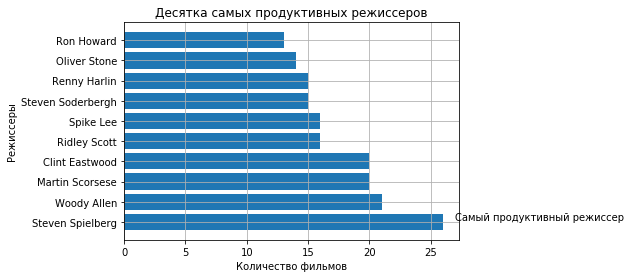

In [6]:
plt.barh(films['director'], films['movie_id'])
plt.xlabel('Количество фильмов')
plt.ylabel('Режиссеры')
plt.title('Десятка самых продуктивных режиссеров')
plt.text(27, 0.1, 'Самый продуктивный режиссер')
plt.grid()

График 2

Сравниваем фильмы с самыми большими съемочными группами по тому, сколько в них актеров. В итоге видим, что количество актеров и других работников на картине может быть не связано. То есть то, что остается за кадром, может быть тоже интересно, и можно его поизучать. 

In [24]:
from ast import literal_eval

In [25]:
films = pd.read_csv('tmdb_5000_credits.csv')

In [26]:
def count_len(row):
    return len(literal_eval(row))

In [27]:
films['crew_quantity'] = films['crew'].apply(count_len)
films['cast_quantity'] = films['cast'].apply(count_len)

In [28]:
films

,movie_id,title,cast,crew,crew_quantity,cast_quantity
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",153,83
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",32,34
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",155,83
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",217,158
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",132,27
...,...,...,...,...,...,...
4798,9367,El Mariachi,"[{""cast_id"": 1, ""character"": ""El Mariachi"", ""c...","[{""credit_id"": ""52fe44eec3a36847f80b280b"", ""de...",11,7
4799,72766,Newlyweds,"[{""cast_id"": 1, ""character"": ""Buzzy"", ""credit_...","[{""credit_id"": ""52fe487dc3a368484e0fb013"", ""de...",8,5
4800,231617,"Signed, Sealed, Delivered","[{""cast_id"": 8, ""character"": ""Oliver O\u2019To...","[{""credit_id"": ""52fe4df3c3a36847f8275ecf"", ""de...",13,7
4801,126186,Shanghai Calling,"[{""cast_id"": 3, ""character"": ""Sam"", ""credit_id...","[{""credit_id"": ""52fe4ad9c3a368484e16a36b"", ""de...",2,5


In [29]:
films = films.sort_values('crew_quantity', ascending=False).reset_index().head(15)

films = films[['cast_quantity', 'crew_quantity']]

films = films.set_index('crew_quantity')

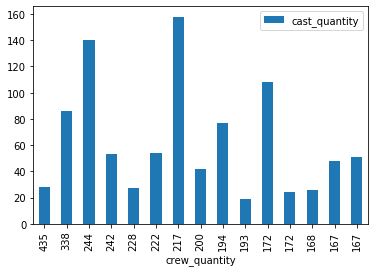

In [30]:
films.plot(kind='bar')

График 3


Смотрим, какое количество слов предпочитают авторы названий фильмов. Предположим, это может быть интересно для изучения особенностей нейминга. В данном случае, кажется, пирог вполне наглядно отражает результат.

In [35]:
films = pd.read_csv('tmdb_5000_credits.csv')

In [36]:
def count_words(row):
    return len(row.split(' '))

Text(0.5, 1.0, 'Количество фильмов с длиной названий от 1 до 5 слов')

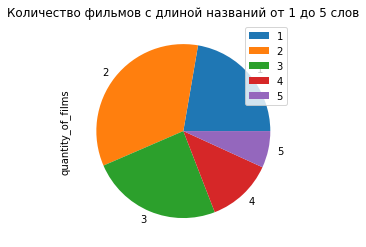

In [37]:
films['len_of_names'] = films['title'].apply(count_words)

films['quantity_of_films'] = films['movie_id']

films = films[['len_of_names', 'quantity_of_films']] 

films = films.groupby('len_of_names').count().head(5)
    
films.plot(kind='pie', y='quantity_of_films')

plt.title('Количество фильмов с длиной названий от 1 до 5 слов')

График 4 

Решаем узнать, над какими фильмами работало больше всего людей (съемочные группы + актеры). Минимальная инфографика вполне здесь подходит. 

In [44]:
from ast import literal_eval

In [45]:
films = pd.read_csv('tmdb_5000_credits.csv')

In [46]:
def count_len(row):
    return len(literal_eval(row))

In [47]:
films['quantity'] = films['crew'].apply(count_len) + films['cast'].apply(count_len)

In [48]:
films = films.sort_values('quantity', ascending=False).reset_index().head(15)

films = films[['title', 'quantity']]

films = films.set_index('title')

In [49]:
films.style.bar()

,quantity
title,
Jurassic World,463
15 Minutes,424
The Wolf of Wall Street,384
The Dark Knight Rises,375
Jason Bourne,327
"Monsters, Inc.",295
Contact,280
The Core,276
V for Vendetta,271


График 5 

На этом графике смотрим, какие режисеры предпочитают снимать много актеров в одном фильме (100 и больше человек). Не знаю, насколько это здесь подходит, но выбрал тепловую карту. 

In [18]:
import re

import seaborn as sns

In [19]:
films = pd.read_csv('tmdb_5000_credits.csv')

In [20]:
def add_director(row):

    x = re.findall(r'(?<="Director",\s"name":\s")[^"]+', row)
    return ''.join(x)

In [21]:
films['director'] = films['crew'].apply(add_director)

films = films[ films.director != '' ]

In [22]:
def add_actors(row):
    n = len(re.findall(r'(?<="name":\s")[^"]+', row))
    if 0 < n < 50: 
        return '0 - 49 actors'
    elif 50 <= n < 100:
        return '50 - 99 actors'
    elif 100 <= n < 150:
        return '100 - 149 actors'
    elif 150 <= n < 200:
        return '150 - 199 actors'
    elif n >= 200: 
        return '200 and more actors'

In [23]:
films['quantity_of_actors'] = films['cast'].apply(add_actors)
films = films[ (films.quantity_of_actors == '150 - 199 actors') | (films.quantity_of_actors == '200 and more actors') | (films.quantity_of_actors == '100 - 149 actors') ]


In [24]:
films = films.pivot_table(index = 'director', columns = 'quantity_of_actors', values = 'title', aggfunc = 'count', fill_value = 0)

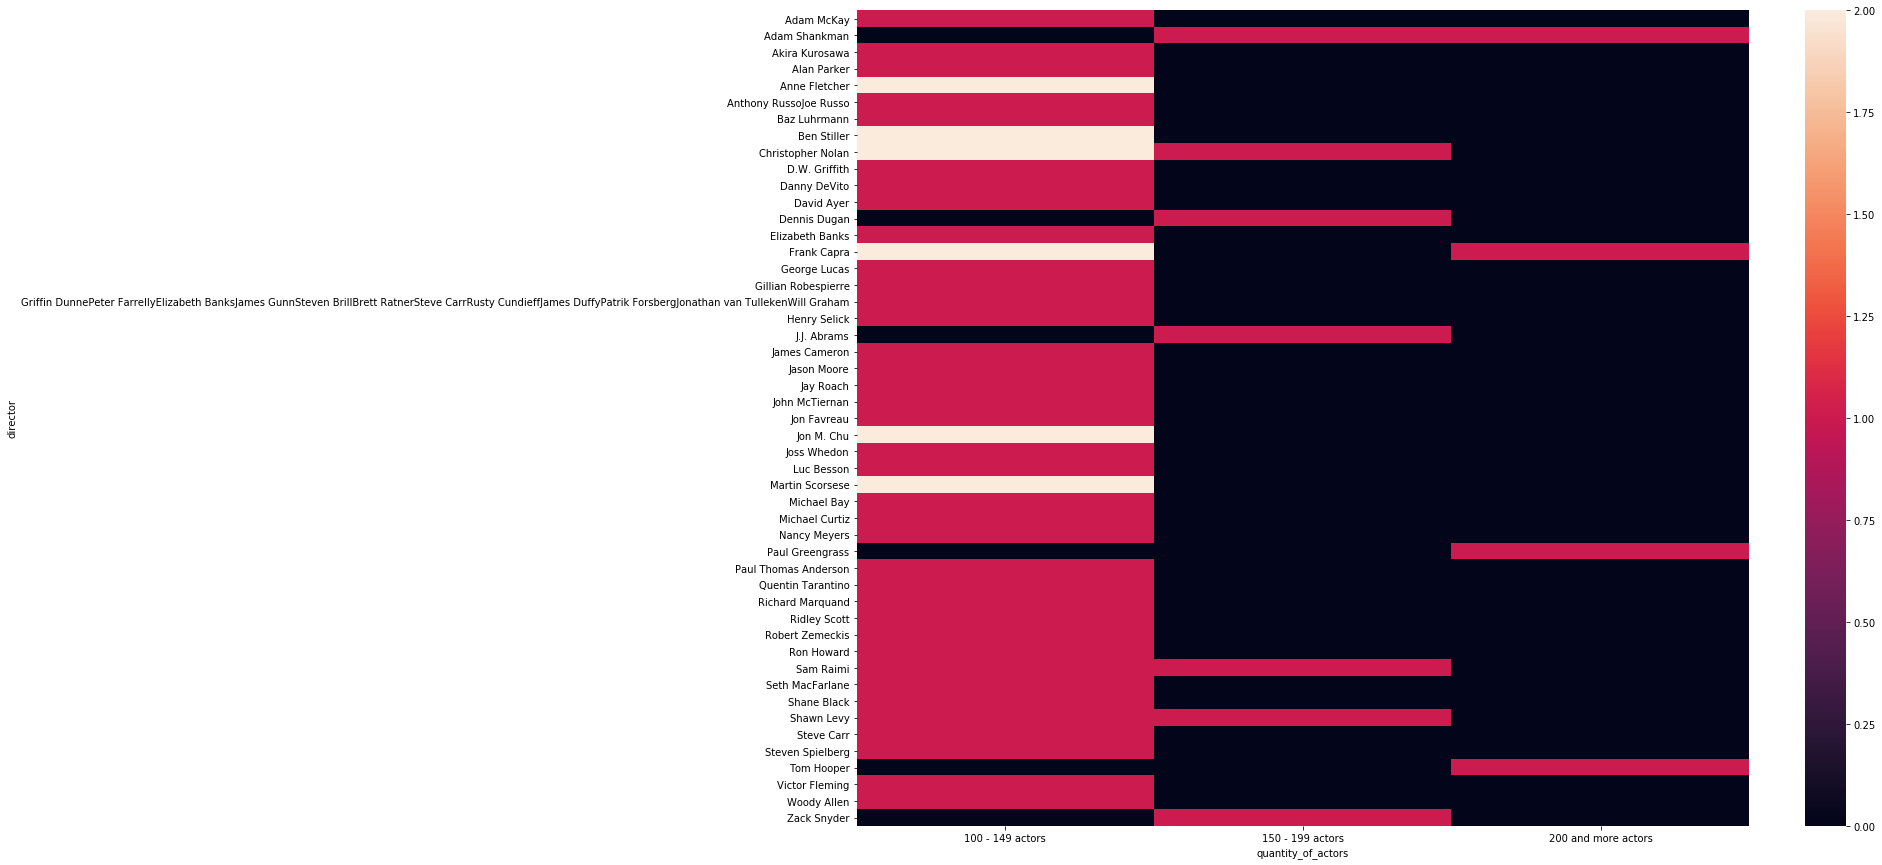

In [25]:
# ax = sns.heatmap(films)

plt.subplots(figsize=(20,15))

sns.heatmap(films)